In [1]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime

%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [2]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [4]:
sql = pg.SQL('''
SELECT a.segment_id, b.length AS seg_length, 
avg(a.segment_tt_avg_all) AS tt_avg_all, avg(a.segment_tt_avg_hc) AS tt_avg_hc,
b.length/avg(a.segment_tt_avg_all) * 3.6 AS spd_all, b.length/avg(a.segment_tt_avg_hc) * 3.6 AS spd_hc
FROM congestion.tt_segments_30min_v1 a
JOIN congestion.segments_v1 b USING (segment_id)
GROUP BY segment_id, b.length
ORDER BY segment_id
''')

pdf_table = pandasql.read_sql(sql, con)

Text(0.5, 1.0, 'Probability Density Function of Speeds')

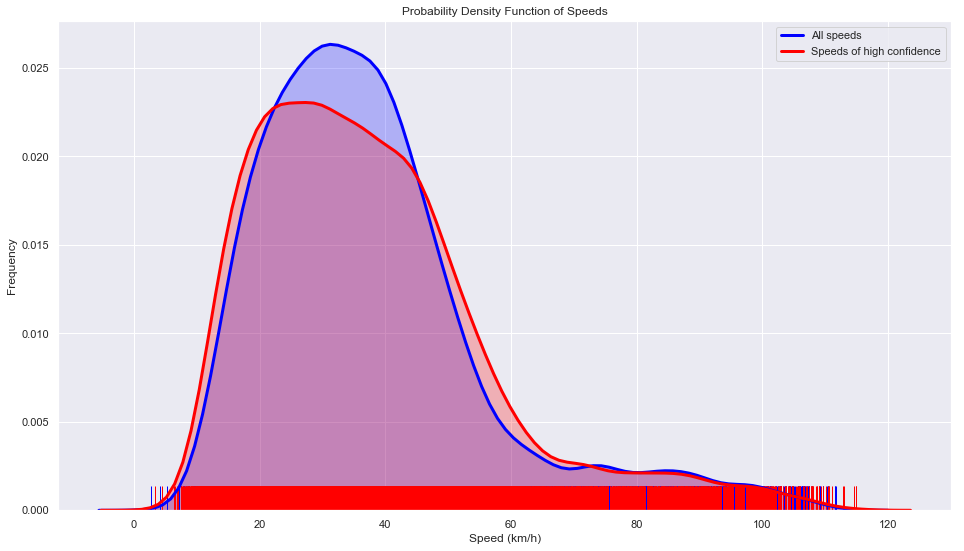

In [8]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.distplot(pdf_table['spd_all'], hist=False, kde=True, rug=True,
             bins=int(180/5), color ='blue', ax=ax,
             kde_kws={'linewidth':3,'shade':True}, label='All speeds')
sns.distplot(pdf_table['spd_hc'], hist=False, kde=True, rug=True, 
             bins=int(180/5), color ='red', ax=ax,
             kde_kws={'linewidth':3,'shade':True}, label='Speeds of high confidence')
ax.legend()
ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Frequency')
ax.set_title('Probability Density Function of Speeds')

Text(0.5, 1.0, 'Probability Density Function of Speeds')

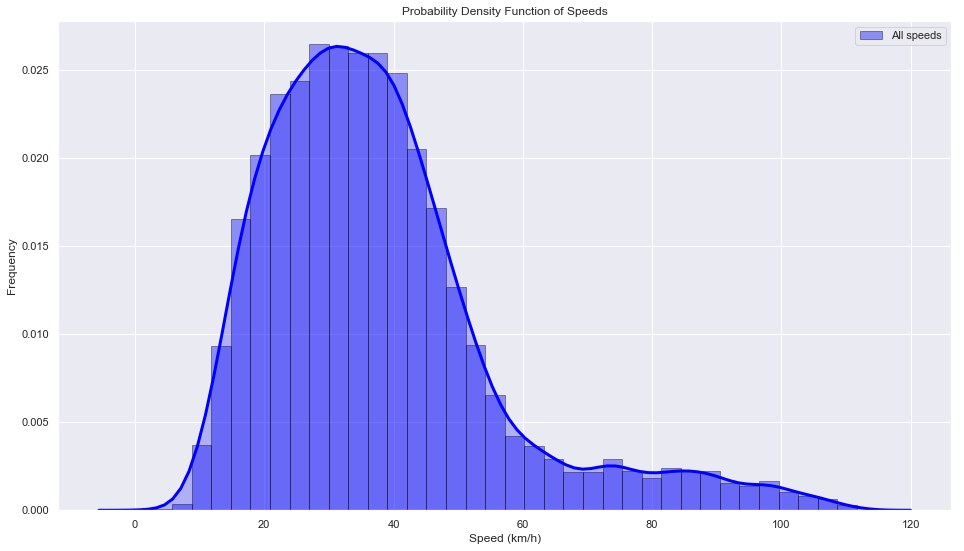

In [11]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.distplot(pdf_table['spd_all'], hist=True, kde=True,
             bins=int(180/5), color ='blue', ax=ax,
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth':3,'shade':True}, 
             label='All speeds')

ax.legend()
ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Frequency')
ax.set_title('Probability Density Function of Speeds')

Text(0.5, 1.0, 'Probability Density Function of Speeds')

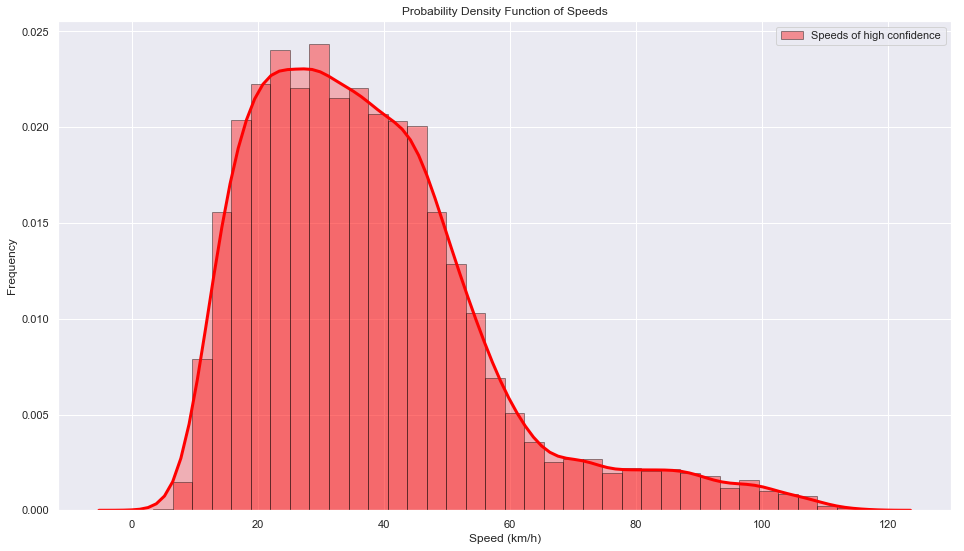

In [12]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
sns.distplot(pdf_table['spd_hc'], hist=True, kde=True,
             bins=int(180/5), color ='red', ax=ax,
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth':3,'shade':True}, 
             label='Speeds of high confidence')

ax.legend()
ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Frequency')
ax.set_title('Probability Density Function of Speeds')